In [2]:
# Import modules
# Make sure you have installed netCDF4, xarray, and nc-time-axis  
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
ds = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")

In [4]:
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

In [8]:
#2.1
data_lw=ds['toa_lw_all_mon'].mean(dim='time')
data_sw=ds['toa_sw_all_mon'].mean(dim='time')
data_sr=ds['solar_mon'].mean(dim='time')
data_nf=ds['toa_net_all_mon'].mean(dim='time')
time=ds['time']

D:\anaconda\lib\site-packages\xarray\plot\plot.py:1451: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
D:\anaconda\lib\site-packages\xarray\plot\plot.py:1466: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(y.dtype, str)


Text(0.5, 1.0, 'TOA net radiation')

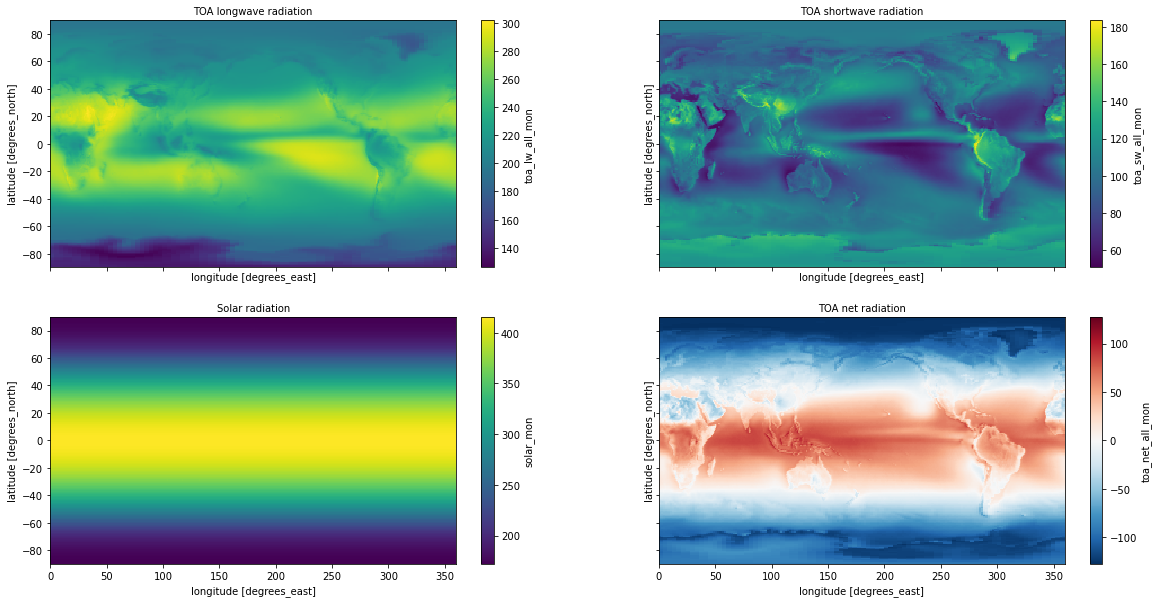

In [9]:
fig,axs=plt.subplots(2,2,sharex=True,sharey=True,figsize=(20,10))
data_lw.plot(ax=axs[0,0])
data_sw.plot(ax=axs[0,1])
data_sr.plot(ax=axs[1,0])
data_nf.plot(ax=axs[1,1])

axs[0,0].set_title('TOA longwave radiation',fontsize=10)
axs[0,1].set_title('TOA shortwave radiation',fontsize=10)
axs[1,0].set_title('Solar radiation',fontsize=10)
axs[1,1].set_title('TOA net radiation',fontsize=10)

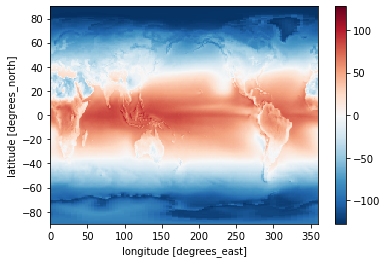

In [10]:
#TOA net radiation = Solar radiation - TOA shortwave_out - TOA longwave_out
verify = data_sr-data_sw-data_lw
verify.plot()

In [14]:
#2.2
weights = np.cos(np.deg2rad(ds.lat))
sr_weight = data_sr.weighted(weights)
lw_weight = data_lw.weighted(weights)
sw_weight = data_sw.weighted(weights)
print('solar radiations:',sr_weight.mean(dim=('lon', 'lat')).values,'(Wm^2)')
print('outgoing longwave:',lw_weight.mean(dim=('lon', 'lat')).values,'(Wm^2)')
print('outgoing shortwave:',sw_weight.mean(dim=('lon', 'lat')).values,'(Wm^2)')

solar radiations: 340.28355233050684 (Wm^2)
outgoing longwave: 240.26666558090503 (Wm^2)
outgoing shortwave: 99.13858336324701 (Wm^2)


Text(0.5, 0, 'Latitude')

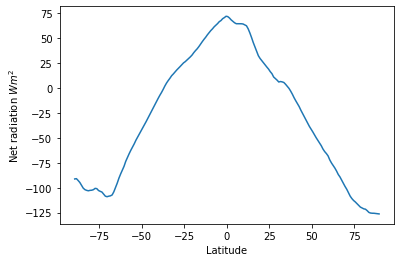

In [15]:
#2.3
fig,ax=plt.subplots()
ax.plot(ds.lat,ds.toa_net_all_mon.mean(dim=['time','lon']))
ax.set_ylabel('Net radiation $W m^2$')
ax.set_xlabel('Latitude')

D:\anaconda\lib\site-packages\xarray\plot\plot.py:1451: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
D:\anaconda\lib\site-packages\xarray\plot\plot.py:1466: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(y.dtype, str)
D:\anaconda\lib\site-packages\xarray\plot\plot.py:1451: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
D:\anaconda\lib\site-packages\xarray\plot\plot.py:1466: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and 

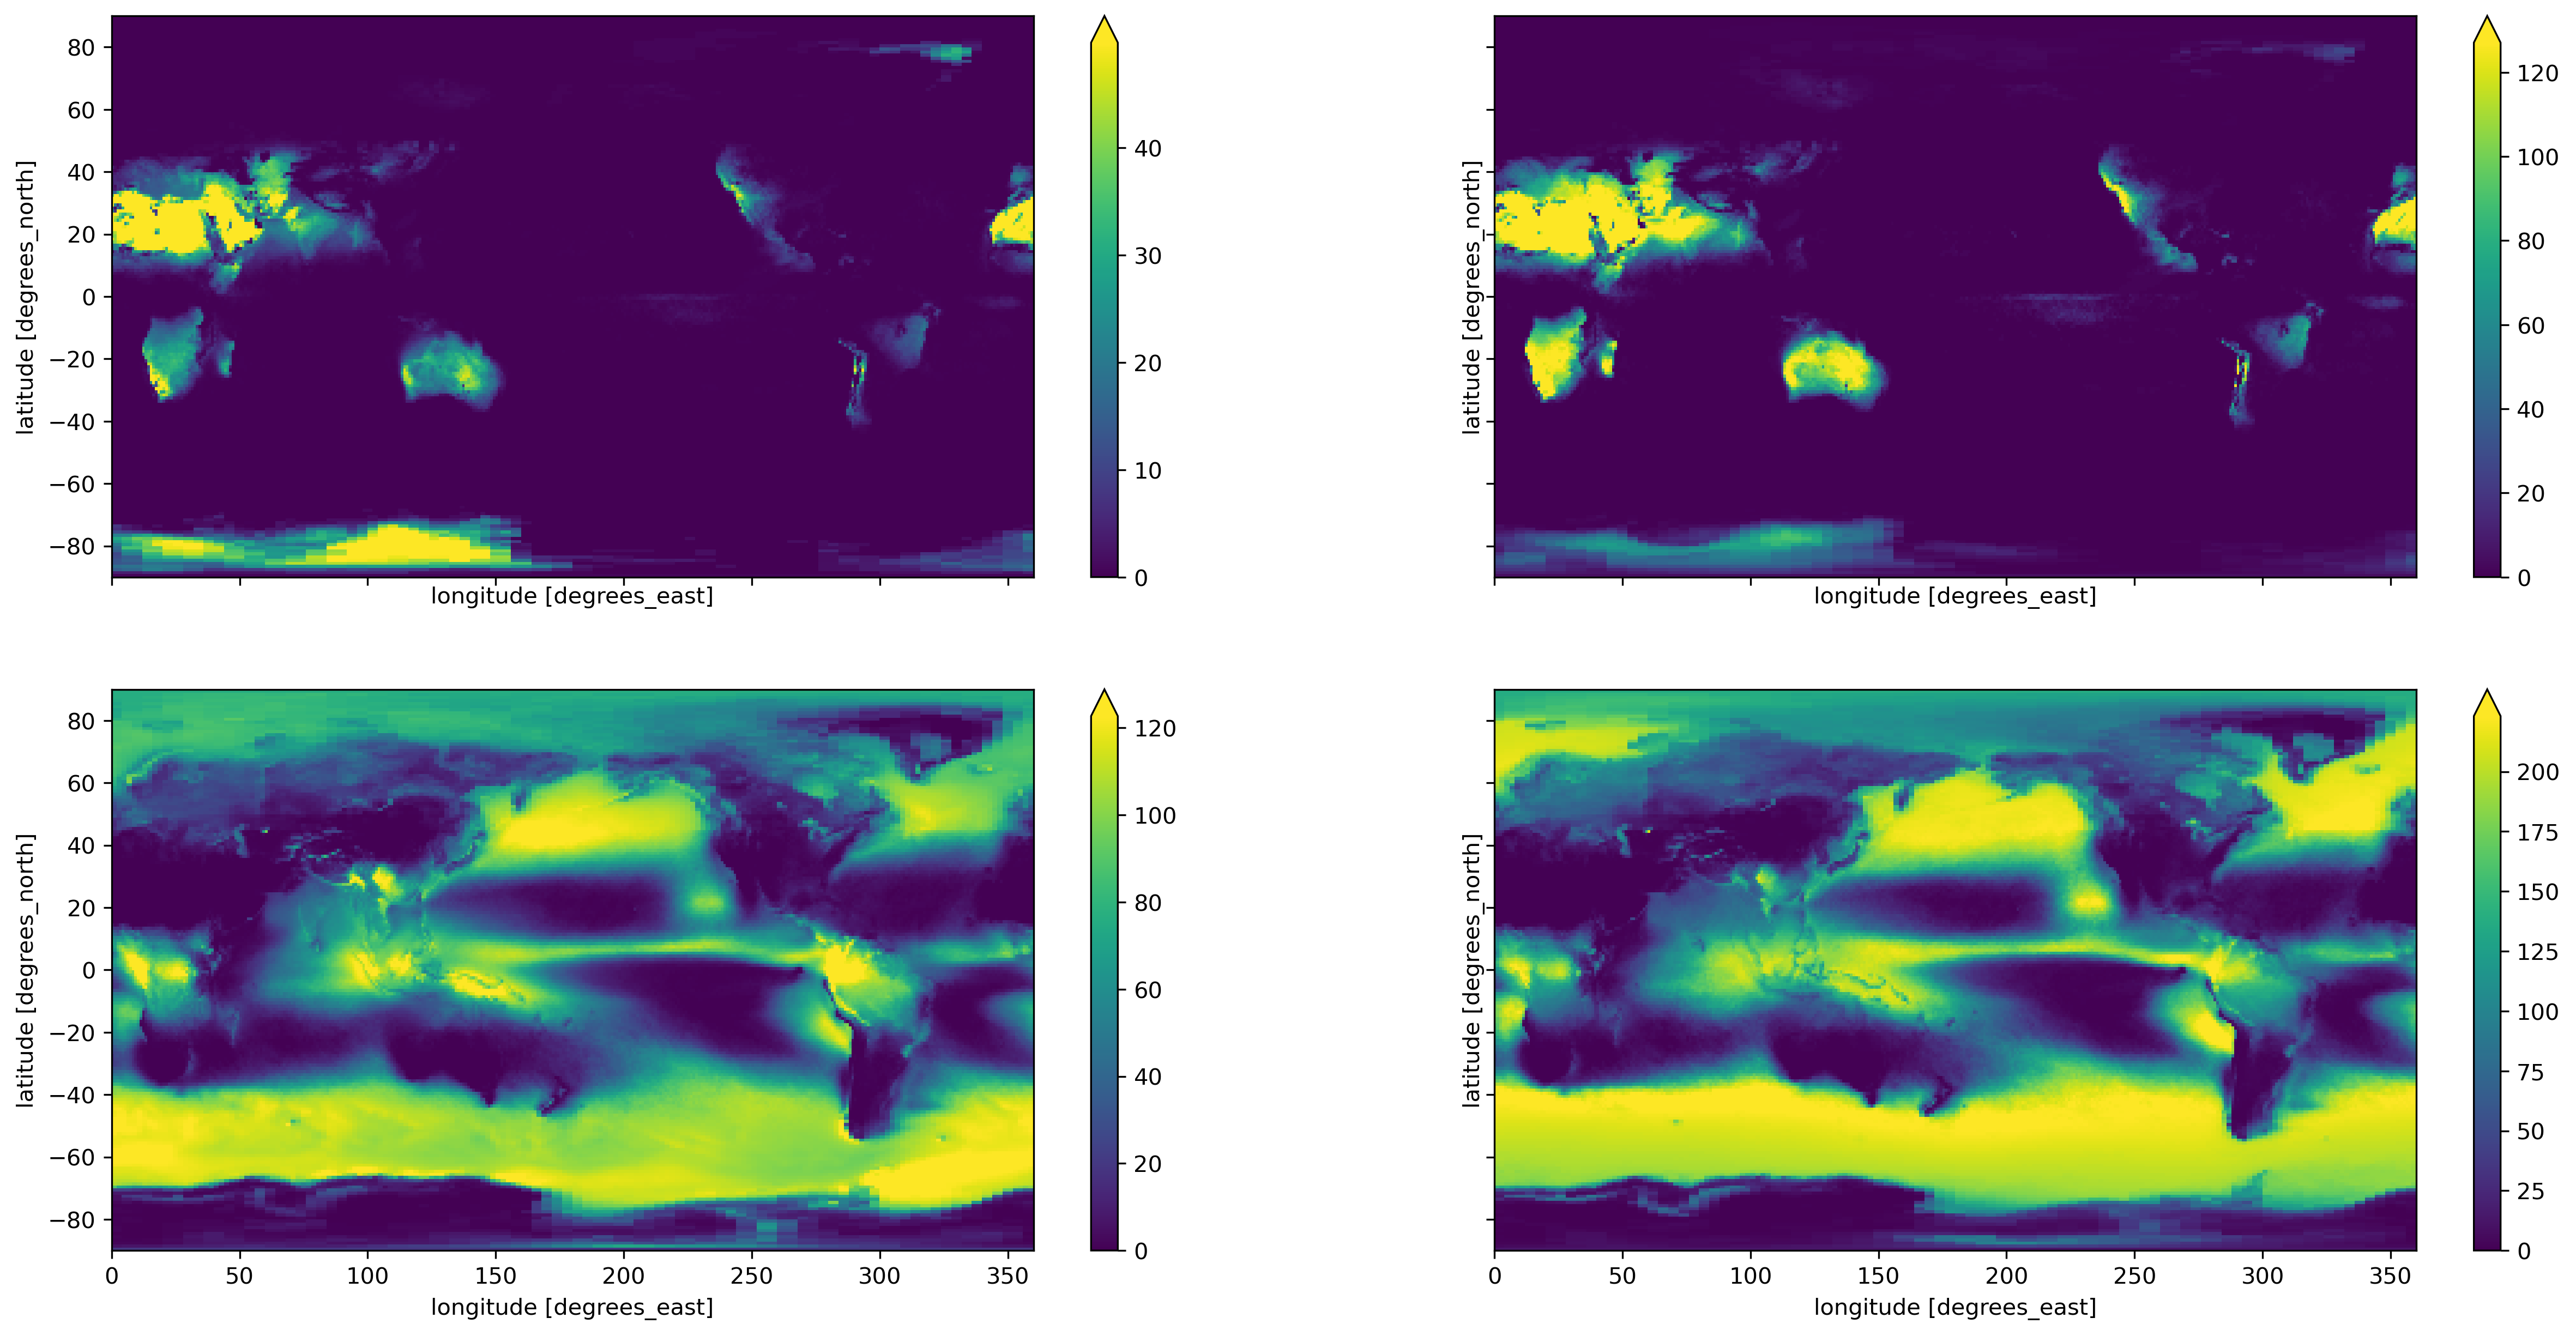

In [16]:
#2.4
da_cf=ds.cldarea_total_daynight_mon
arr_cf=da_cf.mean(dim='time').values
low_cloud=da_cf.where(da_cf<= 25)
high_cloud=da_cf.where(da_cf>= 75)
low_index=xr.where(np.isnan(low_cloud)==False,1,0)
high_index=xr.where(np.isnan(high_cloud)==False,1,0)
low_cloud_sw=ds.toa_sw_all_mon*low_index
low_cloud_lw=ds.toa_lw_all_mon*low_index
high_cloud_sw=ds.toa_sw_all_mon*high_index
high_cloud_lw=ds.toa_lw_all_mon*high_index
fig,axs=plt.subplots(2,2,figsize=(20,10),sharex=True,sharey=True,dpi=300)
low_cloud_sw.mean(dim='time').plot(ax=axs[0,0],robust=True)
low_cloud_lw.mean(dim='time').plot(ax=axs[0,1],robust=True)
high_cloud_sw.mean(dim='time').plot(ax=axs[1,0],robust=True)
high_cloud_lw.mean(dim='time').plot(ax=axs[1,1],robust=True)

In [32]:
#2.5
print('low cloud short wave:',low_cloud_sw.mean(),'(W/m2)')
print('low cloud long wave:',low_cloud_lw.mean(),'(W/m2)')
print('high cloud short wave:',high_cloud_sw.mean(),'(W/m2)')
print('high cloud long wave:',high_cloud_lw.mean(),'(W/m2)')

low cloud short wave: <xarray.DataArray ()>
array(3.88705676) (W/m2)
low cloud long wave: <xarray.DataArray ()>
array(9.89990247) (W/m2)
high cloud short wave: <xarray.DataArray ()>
array(50.90787212) (W/m2)
high cloud long wave: <xarray.DataArray ()>
array(98.10759124) (W/m2)
